<a href="https://colab.research.google.com/github/mvivekc/mura/blob/master/MURA_classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
%reload_ext autoreload
%reload_ext numpy
%reload_ext pandas
%reload_ext fastai
%autoreload 2
%matplotlib inline

In [0]:
!curl https://course.fast.ai/setup/colab | bash

  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100   321  100   321    0     0    580      0 --:--:-- --:--:-- --:--:--   579
Updating fastai...
Done.


In [0]:
!pip install 'pandas>=0.24.2'

    100% |████████████████████████████████| 10.1MB 3.9MB/s 
  Found existing installation: pandas 0.23.4
    Uninstalling pandas-0.23.4:
      Successfully uninstalled pandas-0.23.4


In [0]:
from google.colab import drive
drive.mount('/content/gdrive', force_remount=True)

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3Aietf%3Awg%3Aoauth%3A2.0%3Aoob&scope=email%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdocs.test%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive.photos.readonly%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fpeopleapi.readonly&response_type=code

Enter your authorization code:
··········
Mounted at /content/gdrive


In [0]:
!python --version

Python 3.6.7


In [0]:
#!pip install torch_nightly -f https://download.pytorch.org/whl/nightly/cu92/torch_nightly.html
!pip install fastai

In [0]:
import pandas as pd
from fastai.vision import *
from fastai.callbacks import * 
from fastai.metrics import error_rate
import os

In [0]:
pd.__version__ #make sure this is 0.24.2, else you will have df.head() issues

'0.24.2'

In [0]:
os.chdir("/content/gdrive/My Drive/ml_learning/mining/unzipped/MURA-v1.1/")
!ls -ltra

total 10996
-rw------- 1 root root   69469 Mar 10 18:57  valid_labeled_studies.csv
-rw------- 1 root root  210674 Mar 10 18:57  valid_image_paths.csv
drwx------ 2 root root    4096 Mar 10 18:57  valid
-rw------- 1 root root  778367 Mar 10 18:57  train_labeled_studies.csv
-rw------- 1 root root 2423416 Mar 10 18:57  train_image_paths.csv
drwx------ 2 root root    4096 Mar 10 18:57  train
-rw------- 1 root root       1 Mar 10 19:31  valid_labeled_studies.gsheet
-rw------- 1 root root  185098 Mar 21 00:37  valid_path_with_label.csv
-rw------- 1 root root 2128952 Mar 21 00:54  labels.csv
drwx------ 2 root root    4096 Mar 21 01:26  models
-rw------- 1 root root 2314050 Mar 23 16:04  train_path_with_label.csv
-rw------- 1 root root 1172788 Mar 23 17:17  train_path_with_label_half.csv
-rw------- 1 root root       1 Mar 24 17:55  train_image_paths.gsheet
-rw------- 1 root root       1 Mar 31 11:02 'train_path_with_label (1).gsheet'
-rw------- 1 root root       1 Mar 31 11:02  train_path_with_

In [0]:
path = Path(".")
train = Path("train") #if using dataBunch from_folder method
valid = Path("valid")
path.ls()

[PosixPath('train_labeled_studies.csv'),
 PosixPath('valid_labeled_studies.csv'),
 PosixPath('train_image_paths.csv'),
 PosixPath('valid_image_paths.csv'),
 PosixPath('valid'),
 PosixPath('train'),
 PosixPath('valid_labeled_studies.gsheet'),
 PosixPath('valid_path_with_label.csv'),
 PosixPath('labels.csv'),
 PosixPath('models'),
 PosixPath('train_path_with_label.csv'),
 PosixPath('train_path_with_label_half.csv'),
 PosixPath('train_image_paths.gsheet'),
 PosixPath('train_path_with_label (1).gsheet'),
 PosixPath('train_path_with_label.gsheet'),
 PosixPath('cleaned.csv'),
 PosixPath('train_path_with_label_test.gsheet'),
 PosixPath('train_path_with_label_test .csv')]

In [0]:
csv_file = 'train_path_with_label.csv'
#csv_file = 'train_path_with_label_half.csv' # if you want to run trials runs with limited data
csv_file

'train_path_with_label.csv'

In [0]:
df = pd.read_csv(csv_file, header=None)
df.head()

,0,1
0,train/XR_SHOULDER/patient00001/study1_positive...,1
1,train/XR_SHOULDER/patient00001/study1_positive...,1
2,train/XR_SHOULDER/patient00001/study1_positive...,1
3,train/XR_SHOULDER/patient00002/study1_positive...,1
4,train/XR_SHOULDER/patient00002/study1_positive...,1


In [0]:
fn_paths = [path/name for name in df[0]]; fn_paths[:2]

[PosixPath('train/XR_SHOULDER/patient00001/study1_positive/image1.png'),
 PosixPath('train/XR_SHOULDER/patient00001/study1_positive/image2.png')]

In [0]:
train.ls()

[PosixPath('train/XR_FOREARM'),
 PosixPath('train/XR_HAND'),
 PosixPath('train/XR_FINGER'),
 PosixPath('train/XR_WRIST'),
 PosixPath('train/XR_HUMERUS'),
 PosixPath('train/XR_ELBOW'),
 PosixPath('train/XR_SHOULDER')]

In [0]:
valid.ls()

[PosixPath('valid/XR_ELBOW'),
 PosixPath('valid/XR_HUMERUS'),
 PosixPath('valid/XR_SHOULDER'),
 PosixPath('valid/XR_WRIST'),
 PosixPath('valid/XR_FOREARM'),
 PosixPath('valid/XR_HAND'),
 PosixPath('valid/XR_FINGER')]

In [0]:
def get_labels(file_path): return '1' if '_positive/' in str(file_path) else '0'

In [0]:
#trial with no image normalization
#np.random.seed(2)
#data = ImageDataBunch.from_name_func(path, fn_paths, label_func=get_labels, ds_tfms=get_transforms(), size=256)
#data.normalize

<bound method ImageDataBunch.normalize of ImageDataBunch;

Train: LabelList (32004 items)
x: ImageList
Image (3, 256, 256),Image (3, 256, 256),Image (3, 256, 256),Image (3, 256, 256),Image (3, 256, 256)
y: CategoryList
1,1,1,1,1
Path: .;

Valid: LabelList (8001 items)
x: ImageList
Image (3, 256, 256),Image (3, 256, 256),Image (3, 256, 256),Image (3, 256, 256),Image (3, 256, 256)
y: CategoryList
0,0,0,1,0
Path: .;

Test: None>

In [0]:
#len(data.classes),data.c

(2, 2)

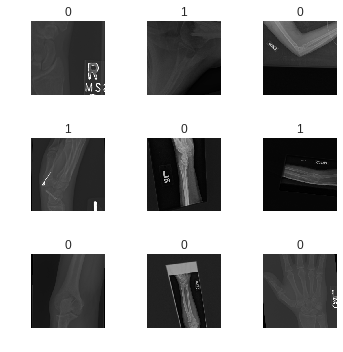

In [0]:
#data.show_batch(rows=3, figsize=(5,5))

In [0]:
#train with non normalized data and resnet 50
#learn = cnn_learner(data, models.resnet50, metrics=[error_rate,accuracy])
#learn.fit_one_cycle(4)

In [0]:
#learn.save('stage-fit-4-resnet50')

In [0]:
#image size of 256 takes too much time.
#normalizing data
np.random.seed(2)
data = ImageDataBunch.from_name_func(path, fn_paths, label_func=get_labels, ds_tfms=get_transforms(), size=256).normalize(imagenet_stats)

In [0]:
data.c

2

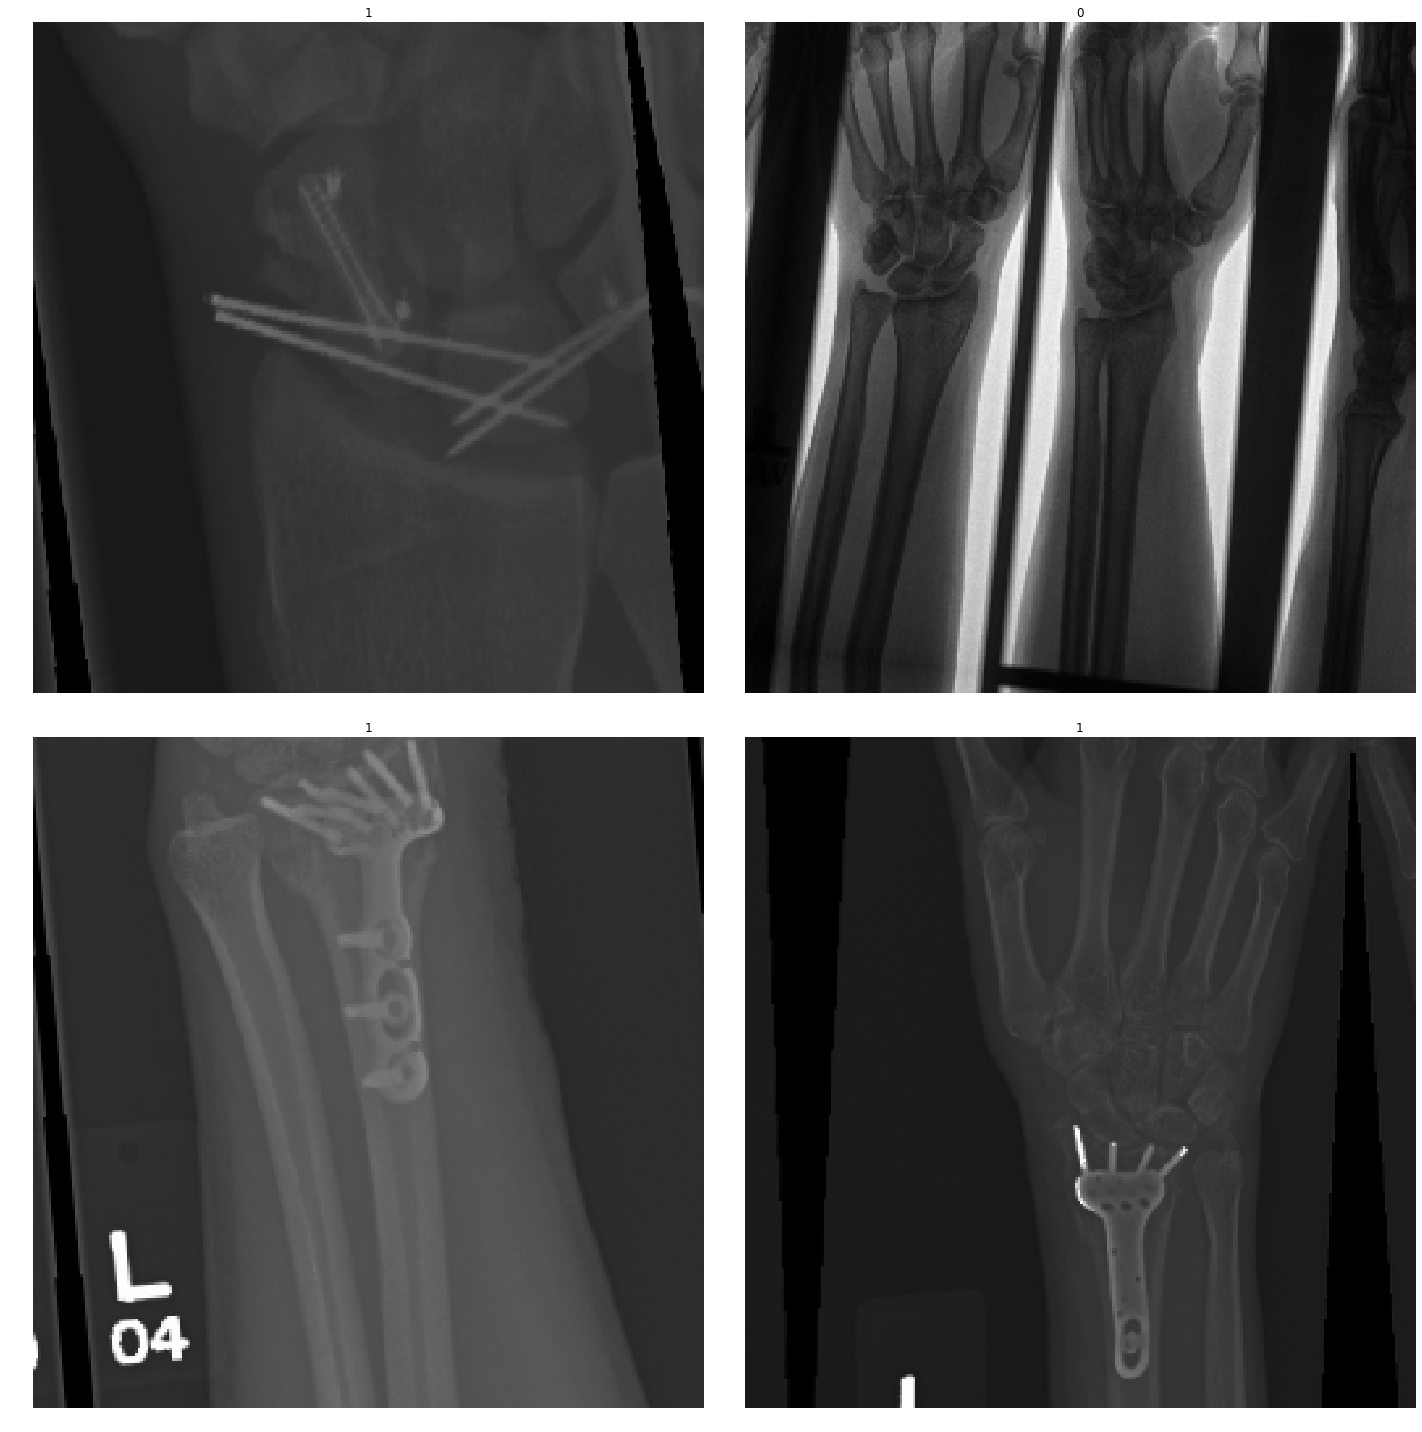

In [0]:
data.show_batch(rows=2, figsize=(20,20))

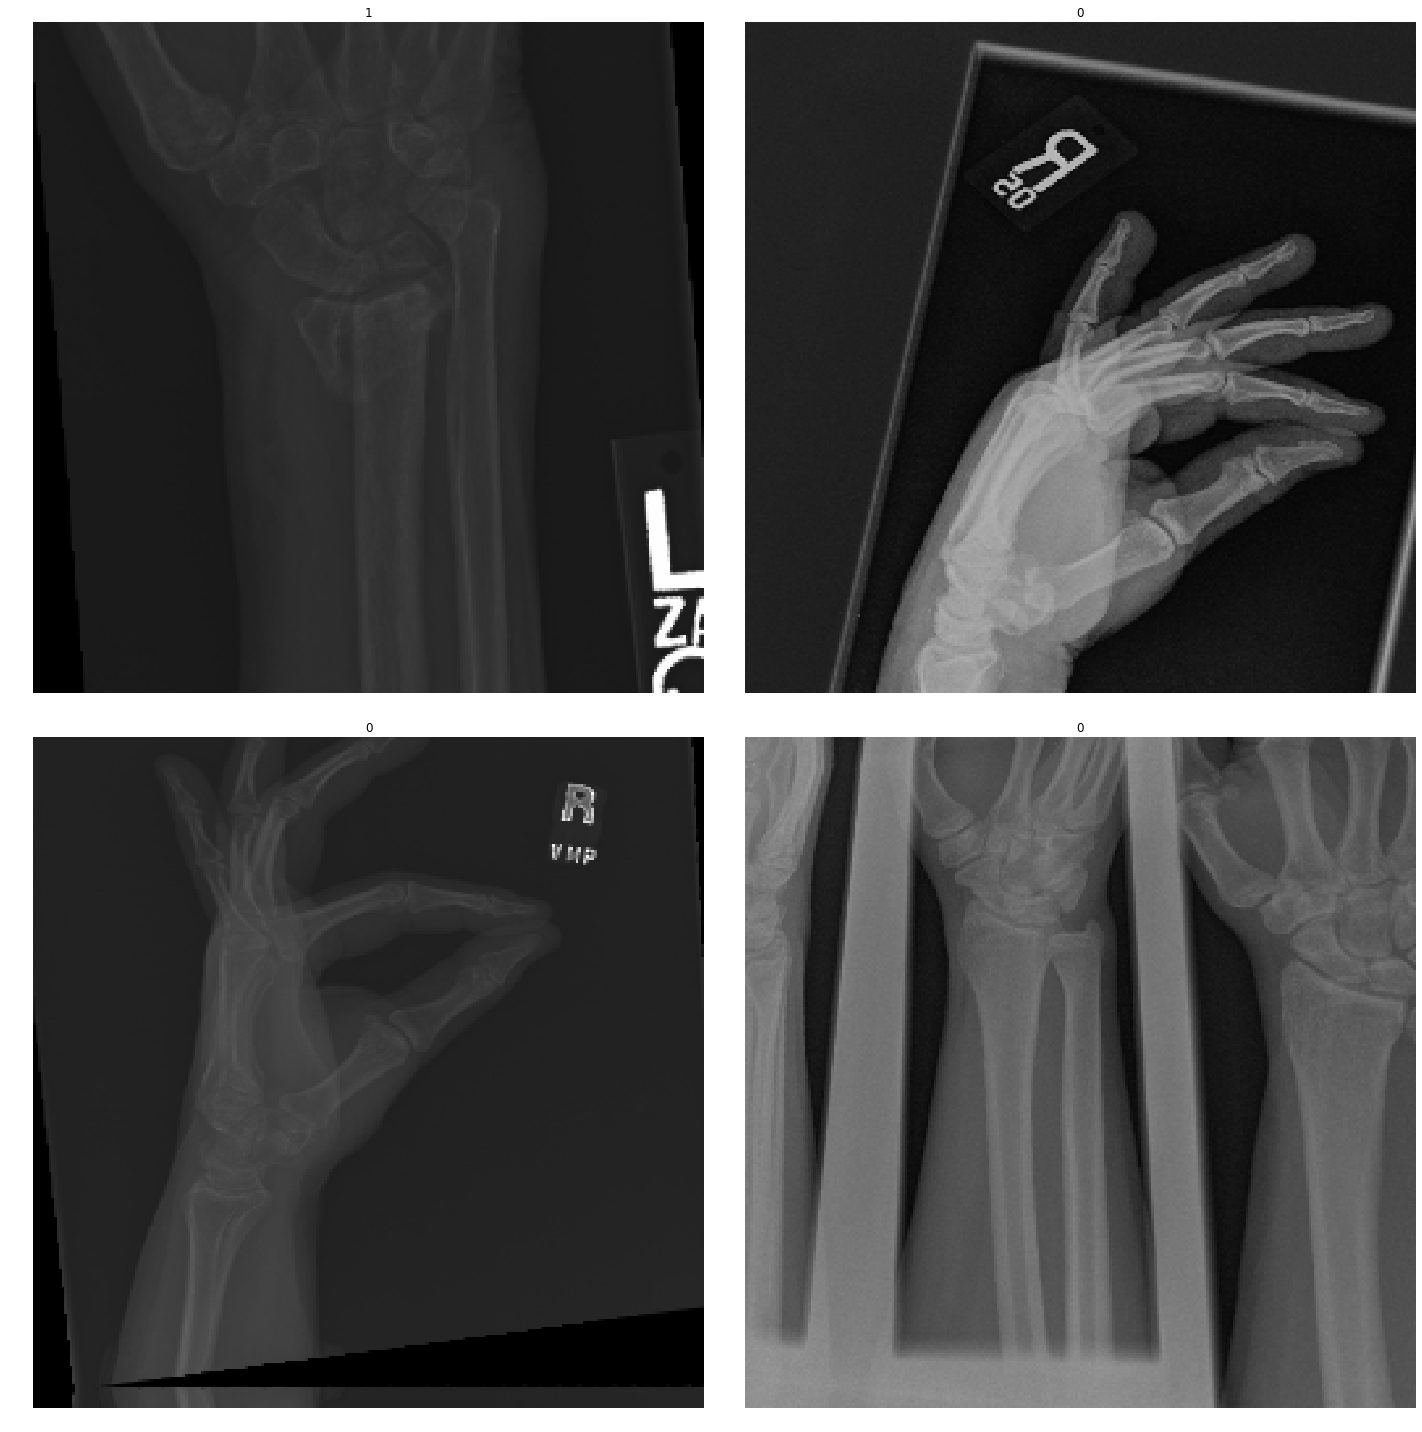

In [0]:
data.show_batch(rows=2, figsize=(20,20))

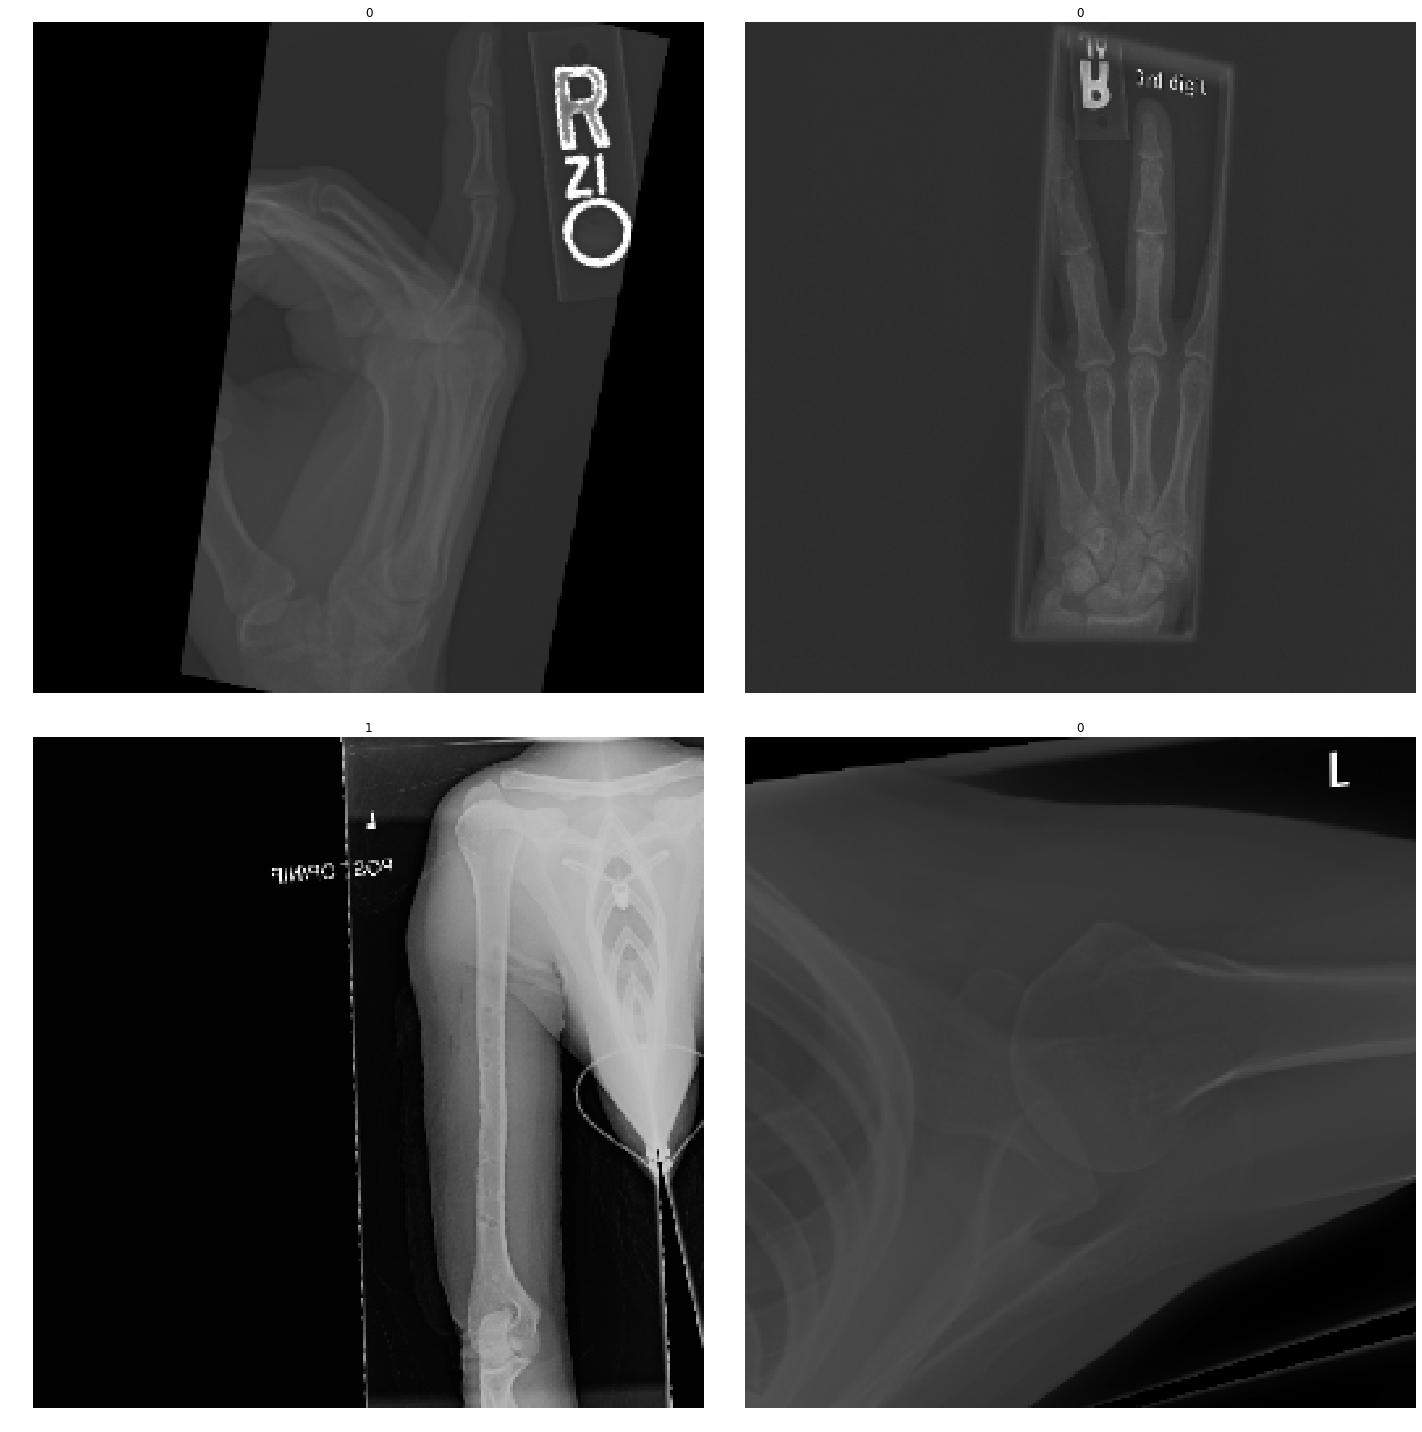

In [0]:
data.show_batch(rows=2, figsize=(20,20))

In [0]:
# To create a ResNET 18 with pretrained weights ( others -> 'resnet18', 'resnet34', 'resnet50', 'resnet101', 'resnet152')
#learn = cnn_learner(data, models.resnet18, metrics=[accuracy,error_rate])
#learn.fit(4)

In [0]:
#learn.save('stage-norm-fit-4-resnet18')

In [0]:
# To create a ResNET 101 with pretrained weights ( others -> 'resnet18', 'resnet34', 'resnet50', 'resnet101', 'resnet152')
#learn = cnn_learner(data, models.resnet34, metrics=[accuracy,error_rate])
#learn.fit(14)

In [0]:
#learn.save('stage-norm-fit-4-resnet34')

In [0]:
#normalized image with resnet 50
#fyi: 6 epocs might lead to overfitting -- can be handled via regularization ( yet to look into that )
#to check overfitting, graph with validation error vs no of epocs will reveal if our data is overfitting.
#learn = cnn_learner(data, models.resnet50, metrics=[accuracy,error_rate])
#learn.fit(6)

In [0]:
#from fastai.callbacks import * 
#learn = cnn_learner(data, models.resnet50, metrics=[accuracy,error_rate], callback_fns=ShowGraph)
#learn.load('stage-norm-fit-6-resnet50')

Downloading: "https://download.pytorch.org/models/resnet50-19c8e357.pth" to /root/.torch/models/resnet50-19c8e357.pth
102502400it [00:04, 21236182.94it/s]


In [0]:
#learn.summary()

In [0]:
#learn.unfreeze()

epoch,train_loss,valid_loss,accuracy,error_rate,time
0,0.435140,0.443881,0.809149,0.190851,2:10:43
1,0.449890,0.445882,0.805399,0.194601,17:16
2,0.479436,0.472034,0.791026,0.208974,16:55
3,0.488595,0.499023,0.772778,0.227222,17:00
4,0.463741,0.469808,0.790276,0.209724,16:58
5,0.462475,0.479159,0.786027,0.213973,16:55
6,0.461098,0.455772,0.808024,0.191976,17:00
7,0.445686,0.500350,0.778653,0.221347,17:03
8,0.434646,0.448900,0.807899,0.192101,17:09
9,0.415655,0.427973,0.819898,0.180102,17:05


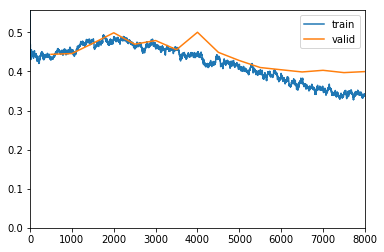

In [0]:
#learn.fit_one_cycle(16)

In [0]:
#learn.save("res50_load-6-res50_unfreeze_epoc16")

LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.


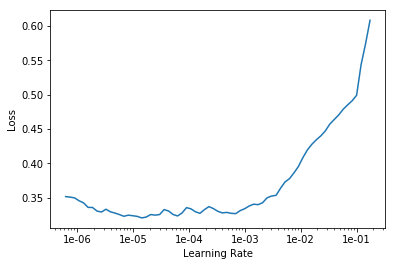

In [0]:
#lr_find(learn)
#learn.recorder.plot()

epoch,train_loss,valid_loss,accuracy,error_rate,time
0,0.754690,0.673143,0.590426,0.409574,38:02
1,0.693966,0.670938,0.595301,0.404699,17:30
2,0.673109,0.665199,0.590176,0.409824,17:20
3,0.676268,0.664842,0.604799,0.395201,17:30
4,0.675152,0.693230,0.593926,0.406074,17:28
5,0.656649,0.652281,0.633421,0.366579,17:28
6,0.622812,0.783729,0.627797,0.372203,18:15
7,0.609561,0.596303,0.676165,0.323835,18:21
8,0.588489,0.636448,0.669791,0.330209,18:19
9,0.576772,0.566862,0.717535,0.282465,17:53


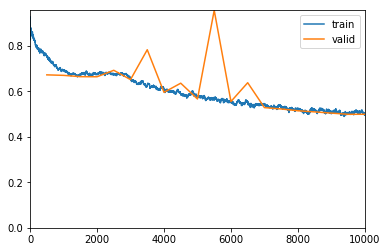

In [0]:
#from fastai.callbacks import * 
#learn = cnn_learner(data, models.resnet50, metrics=[accuracy,error_rate], callback_fns=ShowGraph,pretrained=False)
#learn.fit_one_cycle(20)

LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.


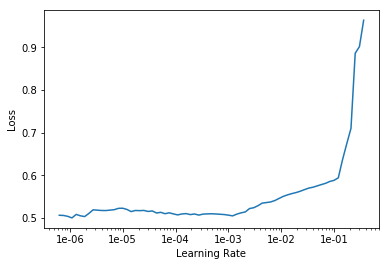

In [0]:
#lr_find(learn)
#learn.recorder.plot()

In [0]:
#learn.save("res50_no-transfer-learning_epoc20")

epoch,train_loss,valid_loss,accuracy,error_rate,time
0,0.505707,0.499109,0.763530,0.236470,17:55
1,0.505030,0.499915,0.764529,0.235471,17:55
2,0.500491,0.499831,0.766404,0.233596,17:57
3,0.505576,0.498757,0.765654,0.234346,17:51
4,0.508205,0.500592,0.767279,0.232721,18:04
5,0.510332,0.497605,0.767529,0.232471,17:56
6,0.497631,0.499056,0.769279,0.230721,17:59
7,0.493813,0.490497,0.772029,0.227972,17:53


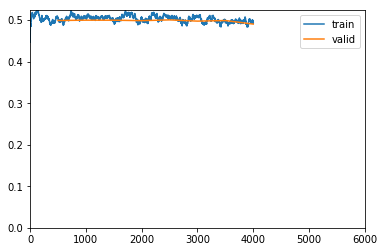

Better model found at epoch 0 with accuracy value: 0.7635295391082764.
Better model found at epoch 1 with accuracy value: 0.7645294070243835.
Better model found at epoch 2 with accuracy value: 0.7664042115211487.
Better model found at epoch 4 with accuracy value: 0.7672790884971619.
Better model found at epoch 5 with accuracy value: 0.7675290703773499.
Better model found at epoch 6 with accuracy value: 0.7692788243293762.
Better model found at epoch 7 with accuracy value: 0.7720285058021545.


In [0]:
#learn.fit_one_cycle(12, max_lr=slice(1e-5,1e-3), callbacks=[SaveModelCallback(learn, every='improvement', monitor='accuracy', name='best')])

In [0]:
learn = cnn_learner(data, models.resnet50, metrics=[accuracy,error_rate], callback_fns=ShowGraph,pretrained=False)
learn.load("best")
learn.fit_one_cycle(20, max_lr=slice(1e-5,1e-3), callbacks=[SaveModelCallback(learn, every='improvement', monitor='accuracy', name='best')])
#ditching this - moving to kaggle

In [0]:
from sklearn.metrics import roc_auc_score
def roc_score(inp, target):
  _, indices = inp.max(1)
  return torch.Tensor([roc_auc_score(target, indices)])[0]

In [0]:
#reduced the epocs to 12 after learning that 16 overfits the data
learn.unfreeze()
learn.fit_one_cycle(12, max_lr=slice(1e-6,1e-4), callbacks=[SaveModelCallback(learn, every='epoch', monitor='accuracy')])

In [0]:
#reduced the epocs to 12 after learning that 16 overfits the data

from fastai.callbacks import * 
learn_new = cnn_learner(data, models.resnet50, metrics=[accuracy,error_rate,fbeta,roc_score], callback_fns=ShowGraph)
learn_new.load("res50_load-6-res50_unfreeze_epoc16")

Learner(data=ImageDataBunch;

Train: LabelList (32004 items)
x: ImageList
Image (3, 256, 256),Image (3, 256, 256),Image (3, 256, 256),Image (3, 256, 256),Image (3, 256, 256)
y: CategoryList
1,1,1,1,1
Path: .;

Valid: LabelList (8001 items)
x: ImageList
Image (3, 256, 256),Image (3, 256, 256),Image (3, 256, 256),Image (3, 256, 256),Image (3, 256, 256)
y: CategoryList
0,0,0,1,0
Path: .;

Test: None, model=Sequential(
  (0): Sequential(
    (0): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
    (1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (2): ReLU(inplace)
    (3): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
    (4): Sequential(
      (0): Bottleneck(
        (conv1): Conv2d(64, 64, kernel_size=(1, 1), stride=(1, 1), bias=False)
        (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
        (conv2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1,

In [0]:
learn_new.fit_one_cycle(2)

In [0]:
interp = ClassificationInterpretation.from_learner(learn)

losses,idxs = interp.top_losses()

len(data.valid_ds)==len(losses)==len(idxs)

In [0]:
interp.plot_top_losses(9, figsize=(15,11))

In [0]:
interp.plot_confusion_matrix(figsize=(6,6), dpi=120)

In [0]:
learn.recorder.plot_losses()

In [0]:
interp.most_confused(min_val=2)

In [0]:
def cal_auc_and_plot(learner):
    preds, y = learner.get_preds()
    probs = np.exp(preds[:,1])
    fpr, tpr, thresholds = roc_curve(y, probs, pos_label=1)
    roc_auc = auc(fpr, tpr)
    plt.figure()
    plt.plot(fpr, tpr, color='darkorange', label='ROC curve (area = %0.2f)' % roc_auc)
    plt.plot([0, 1], [0, 1], color='navy', linestyle='--')
    plt.xlim([-0.01, 1.0])
    plt.ylim([0.0, 1.01])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver operating characteristic')
    plt.legend(loc="lower right")
    return roc_auc

In [0]:
import matplotlib.pyplot as plt
from sklearn.utils import shuffle
from sklearn.model_selection import train_test_split
from sklearn.metrics import roc_curve, auc

0.8926689634437921

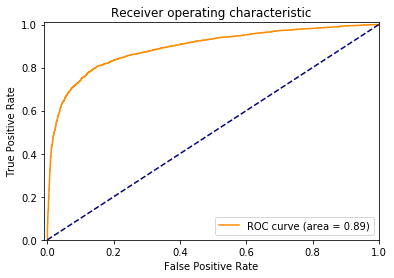

In [0]:
stage1_auc = cal_auc_and_plot(learn)
stage1_auc

In [0]:
stage1_auc

0.8926689634437921

In [0]:
                          learn.metrics = [fbeta]

learn.fit_one_cycle(1)